<a href="https://colab.research.google.com/github/Jeremy26/tracking_course/blob/master/1_YOLO_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the YOLO Workshop!

In this workshop, we will learn how to use the YOLO algorithm for object detection

![](https://www.researchgate.net/profile/Kedar-Potdar-2/publication/329217107/figure/fig4/AS:697578261852162@1543327026650/Object-detection-in-a-dense-scene.ppm)

Import the YOLO files and the images

In [ ]:
!wget https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip && unzip tracking_course.zip

--2022-03-28 12:19:41--  https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip
Resolving thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)... 52.95.156.36
Connecting to thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)|52.95.156.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632297503 (603M) [application/zip]
Saving to: ‘tracking_course.zip’

tracking_course.zip 100%[===================>] 603.01M  28.8MB/s    in 22s     

2022-03-28 12:20:04 (27.5 MB/s) - ‘tracking_course.zip’ saved [632297503/632297503]

Archive:  tracking_course.zip
   creating: tracking_course/
  inflating: __MACOSX/._tracking_course  
  inflating: tracking_course/coco.names  
  inflating: __MACOSX/tracking_course/._coco.names  
  inflating: tracking_course/.DS_Store  
  inflating: __MACOSX/tracking_course/._.DS_Store  
  inflating: tracking_course/mo

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import copy

## Read an Image

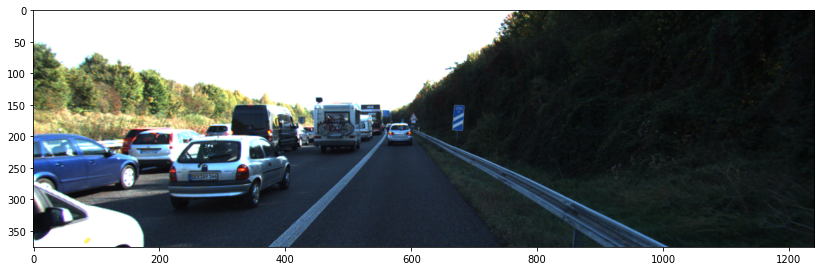

In [ ]:
img = cv2.cvtColor(cv2.imread("tracking_course/data/0000000230.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,7))
plt.imshow(img)
plt.show()

## YOLOv5

In [ ]:
!pip install yolo5 # version 0.0.1 used at the moment of recording

     |████████████████████████████████| 837 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 57.7 MB/s 
     |████████████████████████████████| 132 kB 73.0 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 87 kB 9.3 MB/s 
     |████████████████████████████████| 79 kB 9.6 MB/s 
     |████████████████████████████████| 8.6 MB 53.0 MB/s 
     |████████████████████████████████| 138 kB 76.9 MB/s 
     |████████████████████████████████| 127 kB 64.8 MB/s 
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 4.3 MB 56.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=9102141abc045e1f17d105c97d10e357d0a72bad669749d6a583b000d289aa37
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Un

In [ ]:
import yolov5

# load model
model = yolov5.load('tracking_course/yolov5s.pt')

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
help(model)

In [ ]:
model.conf = 0.5
model.iou = 0.4

image = copy.deepcopy(img)
results = model(image)

In [ ]:
predictions = results.pred[0]

boxes = predictions[:, :4].tolist()
scores = predictions[:,4].tolist()
categories = predictions[:,5].tolist()

print(boxes)
print(scores)
print(categories)

[[0.0, 192.24169921875, 167.97128295898438, 293.19415283203125], [559.4194946289062, 178.3046875, 602.0789184570312, 212.72305297851562], [212.56971740722656, 195.15029907226562, 408.8998107910156, 318.1595764160156], [133.5529327392578, 185.45498657226562, 265.65155029296875, 260.71484375], [312.91619873046875, 149.4611358642578, 421.98846435546875, 230.4169921875], [442.8334045410156, 143.1591796875, 541.9679565429688, 225.8117218017578], [0.0, 258.53338623046875, 177.9089813232422, 375.3619079589844]]
[0.85888671875, 0.80078125, 0.7880859375, 0.75146484375, 0.6669921875, 0.6474609375, 0.56201171875]
[2.0, 2.0, 2.0, 2.0, 7.0, 7.0, 2.0]


In [ ]:
boxes_int = [[int(v) for v in box] for box in boxes]
categories_int = [int(c) for c in categories]

print(boxes_int)
print(scores)
print(categories_int)

[[0, 192, 167, 293], [559, 178, 602, 212], [212, 195, 408, 318], [133, 185, 265, 260], [312, 149, 421, 230], [442, 143, 541, 225], [0, 258, 177, 375]]
[0.85888671875, 0.80078125, 0.7880859375, 0.75146484375, 0.6669921875, 0.6474609375, 0.56201171875]
[2, 2, 2, 2, 7, 7, 2]


In [ ]:
def id_to_color(idx):
    """
    Random function to convert an id to a color
    Do what you want here but keep numbers below 255
    """
    blue = idx*5 % 256
    green = idx*12 %256
    red = idx*23 %256
    return (red, green, blue)

def draw_boxes_v5(image, boxes, categories, mot_mode=False):
    h, w, _ = image.shape
    for i, box in enumerate(boxes):
        label = classes[int(categories[i])]
        color = id_to_color(i*10) if mot_mode==True else (255,0,0)
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, thickness=7)
        cv2.putText(image, str(label), (int(box[0]), int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), thickness=3)
    return image

In [ ]:
classesFile = "tracking_course/coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

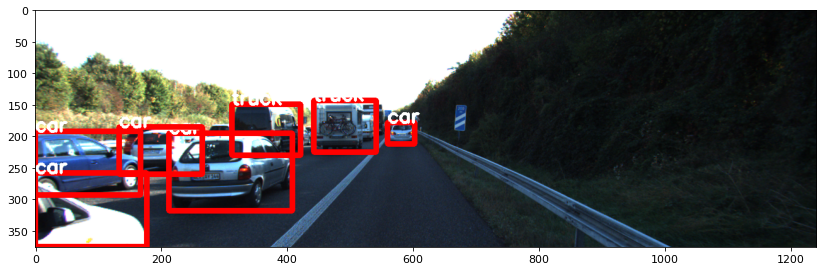

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(draw_boxes_v5(img, boxes, categories,mot_mode=False))
plt.show()

### Create an Inference Function

In [ ]:
def inference(img):
    results = model(img)
    predictions = results.pred[0]
    boxes = predictions[:, :4].tolist()
    boxes_int = [[int(v) for v in box] for box in boxes]
    scores = predictions[:,4].tolist()
    categories = predictions[:,5].tolist()
    categories_int = [int(c) for c in categories]
    img_out = draw_boxes_v5(img, boxes_int, categories_int, mot_mode=False)
    return img_out, boxes_int, categories_int, scores

## Run on a Video

In [ ]:
import glob 
from tqdm import tqdm

video_images = sorted(glob.glob("tracking_course/data/*.png"))
result_video = []

for img in tqdm(video_images):
    img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    img_out, _, _, _ = inference(img)
    result_video.append(img_out)

100%|██████████| 837/837 [00:26<00:00, 31.81it/s]


In [ ]:
out = cv2.VideoWriter('out_yolo.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, (img.shape[1],img.shape[0]))

for img in result_video:
  out.write(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
out.release()

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('out_yolo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)